In [41]:
import numpy as np
from matplotlib import pylab as plt
import os
from collections import Counter

%matplotlib inline

In [13]:
def img2vec(file_path):
    vec = np.zeros((1024,))
    with open(file_path) as f:
        for index, line in enumerate(f):
            line_vec = [int(i) for i in line.strip()]
            vec[index * 32:index * 32 +32] = np.array(line_vec)
            
    return vec

In [26]:
example_img = img2vec('data/trainingDigits/2_1.txt')
example_img.shape

(1024,)

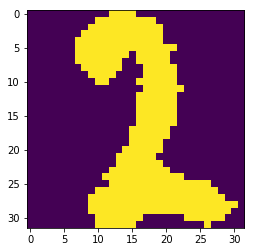

In [27]:
plt.imshow(example_img.reshape((32, 32)))

In [30]:
def create_dataset(path):
    X = []
    Y = []
    
    for filename in os.listdir(path):
        filepath = os.path.join(path, filename)
        vec = img2vec(filepath)
        X.append(vec)
        
        y = int(filename.split('_')[0])
        Y.append(y)
        
    return np.stack(X), np.stack(Y)

In [31]:
X_train, Y_train = create_dataset('data/trainingDigits/')
X_train.shape, Y_train.shape

((1934, 1024), (1934,))

In [32]:
X_test, Y_test = create_dataset('data/testDigits/')
X_test.shape, Y_test.shape

((946, 1024), (946,))

In [65]:
class Scaler:
    def fit_transform(self, X):
        self._min = np.min(X, axis=0)
        self._max = np.max(X, axis=0)
        
        return (X - self._min) / (self._max - self._min + 1e-7)
    
    def transform(self, X):
        return (X - self._min) / (self._max - self._min + 1e-7)

In [66]:
def l2_distance(A, b):
    diff = A - b
    diff_l2_norm= np.sqrt(np.sum(np.square(diff), axis=1))
    
    return diff_l2_norm

In [67]:
def kNN_predict(input_x, train_X, train_Y, k=10, distance_func=l2_distance):
    distances = distance_func(train_X, input_x)
    near_k_indexes = np.argsort(distances)[:k]
    near_k_label = train_Y[near_k_indexes]
    
    return Counter(near_k_label).most_common(1)[0][0]

In [68]:
def kNN_evaluate(train_X, train_Y, test_X, test_Y, k=10):
    test_len = test_X.shape[0]
    
    predict_Y = []
    for i in range(test_len):
        test_x = test_X[i]
        predict_y = kNN_predict(test_x, train_X, train_Y, k)
        predict_Y.append(predict_y)
        
    predict_Y = np.stack(predict_Y)
    
    accuracy = (predict_Y == test_Y).sum() / test_len
    
    return accuracy

In [72]:
scaler = Scaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [73]:
num = 2
kNN_predict(X_test_scale[num], X_train_scale, Y_train, k=3), Y_test[num]

(3, 3)

In [74]:
kNN_evaluate(X_train_scale, Y_train, X_test_scale, Y_test, k=3)

0.9894291754756871

### sklearn 实现

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [84]:
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [85]:
kNN = KNeighborsClassifier(n_neighbors=3)

In [86]:
kNN.fit(X_train_scale, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [87]:
kNN.score(X_test_scale, Y_test)

0.9894291754756871